## Motivation
We want to train an algorithm to classify images as being dogs or cats.

## Problem
We need a dataset to do this. We will get data from the [Unsplash Image API](https://unsplash.com/developers).

## Caveats
Sometimes, raw data is unsuitable for machine learning algorithms. For instance, we may want:
- Only images that are landscape (i.e. width > height)
- All our images to be of the same resolution

---
## Step 1: Get cat and dog image URLs from the API
We will use the [`search/photos` GET method](https://unsplash.com/documentation#search-photos).

In [9]:
import requests as re
from api_keys import client_id

# Root URL for the API
root_endpoint = 'https://api.unsplash.com/'

In [10]:
from IPython.display import JSON

# Test out the image search API method
response = re.get('https://api.unsplash.com/search/photos', 
                  params={'query': 'desk', 'per_page': 30, 'client_id': client_id})
result = response.json()

# Nicely display the returned JSON to understand its structure
JSON(result)

<IPython.core.display.JSON object>

In [13]:
# Convenience function for making API calls and grabbing results
def search_photos(search_term):
    api_method = 'search/photos'
    endpoint = root_endpoint + api_method
    response = re.get(endpoint, 
                      params={'query': search_term, 'per_page': 30, 'client_id': client_id})
    status_code, result = response.status_code, response.json()
    
    if status_code != 200:
        print(f'Bad status code: {status_code}')
    
    image_urls = []
    for img in result['results']:
        img_url = img['urls']['small']
        image_urls.append(img_url)
    
    return image_urls

dog_urls = search_photos('dog')
cat_urls = search_photos('cat')

# Print one image URL to see if our function worked
print(cat_urls[0])

https://images.unsplash.com/photo-1530281700549-e82e7bf110d6?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MnwxOTY1NDl8MHwxfHNlYXJjaHwxfHxkb2d8ZW58MHx8fHwxNjQyMDkzMjI0&ixlib=rb-1.2.1&q=80&w=400


---
## Step 2: Download  the images from the URLs
(Step 2a: Google [how to download an image from a URL in Python](https://stackoverflow.com/a/40944159))

We'll just define the function to download an image for now. Later on, we'll use it on images one at a time (but after doing some processing).

In [14]:
from PIL import Image

def download_image(url):
    image = Image.open(re.get(url, stream=True).raw)
    return image

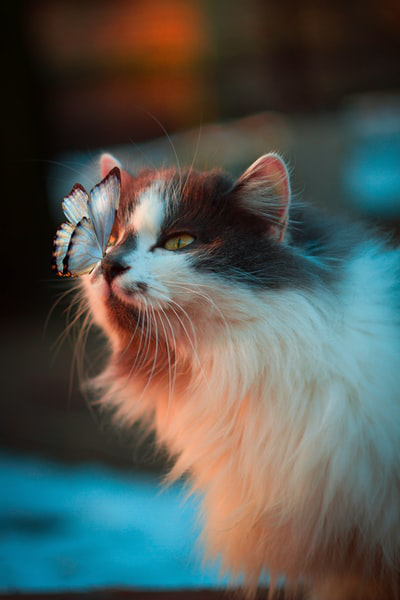

In [20]:
# Test out the function for downloading images
test_img = download_image(cat_urls[0])
test_img

---
## Step 3: Download and save images that meet our requirements
We'll need to know how to work with the [PIL Image data type](https://pillow.readthedocs.io/en/stable/reference/Image.html), which is what our `download_image(url)` function returns. Namely, we need to be able to a) get it's resolution and b) resize it.

In [23]:
# Test out some of the functions/attributes we need

# Getting the image's resolution
print(f'Image width: {test_img.width}\nImage height: {test_img.height}\n')

# Try resizing the image
test_img_resized = test_img.resize((256, 256))
print(f'Image width (resized): {test_img_resized.width}\nImage height (resized): {test_img_resized.height}')

# Try saving the resized image to our current project folder
test_img_resized.save('testing_cat.jpg')

Image width: 400
Image height: 600

Image width (resized): 256
Image height (resized): 256


In [6]:
import os


def is_landscape(image):
    return image.width > image.height


def save_category_images(urls, category_name, resolution=(256, 256)):
    save_folder = f'saved_images/{category_name}'
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
        
    for i, url in enumerate(urls):
        image = download_image(url)
        if is_landscape(image):
            image = image.resize(resolution)
            filename = f'{i}.jpg'
            save_path = os.path.join(save_folder, filename)
            image.save(save_path)

In [7]:
save_category_images(dog_urls, 'dogs')
save_category_images(cat_urls, 'cats')